✍[BSRGAN](https://github.com/cszn/BSRGAN)

## ⚓[First click on this drive link](https://drive.google.com/drive/folders/13kfr3qny7S2xwG9h7v95F5mkWs0OmU0D)

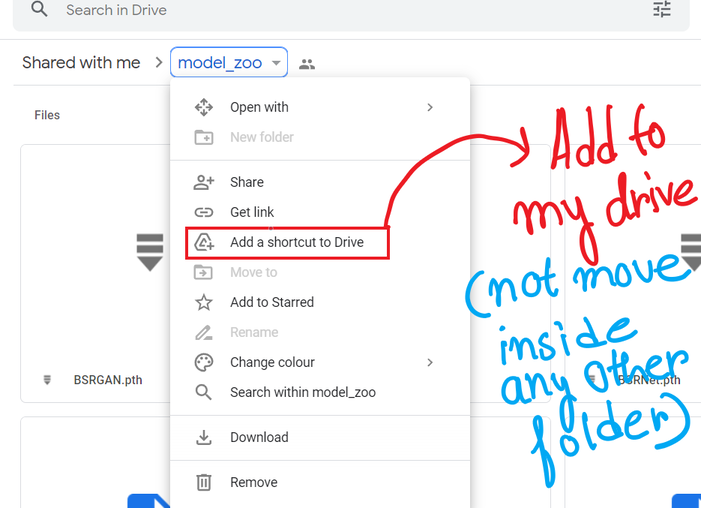

In [ ]:
# @title ##**Mount drive** { display-mode: "form" }

from IPython.display import clear_output
%cd /content/
from google.colab import drive
import os
import shutil
drive.mount('/content/gdrive')
!git clone https://github.com/cszn/BSRGAN.git
clear_output()
%cp -a "/content/gdrive/MyDrive/model_zoo/." "/content/BSRGAN/model_zoo/"
%cd /content/gdrive/MyDrive/
!mkdir input_video
!mkdir output_video
clear_output()

In [ ]:
# @title ##**Upload video** { display-mode: "form" }

%cd /content/gdrive/MyDrive/input_video
from google.colab import files
uploaded = files.upload()
f_names=[]
for fn in uploaded.keys():
      f_names.append(fn)
clear_output()      

In [ ]:
# @title ##**Extract video frames** { display-mode: "form" }

%cd /content/BSRGAN     
if os.path.exists("/content/BSRGAN/reduce_size"):
  shutil.rmtree("/content/BSRGAN/reduce_size")
!mkdir reduce_size
%cd /content/BSRGAN/reduce_size
clear_output() 
var_x=os.system(f"ffmpeg -i '/content/gdrive/MyDrive/input_video/{f_names[-1]}' %06d.png")
if var_x!=0:
  print("failed to extract frames")
%cd /content/BSRGAN  

In [ ]:
# @title ##**Select option** { display-mode: "form" }

%cd /content/BSRGAN
reduce_image_quality_before_upscaling = False #@param {type:"boolean"}
for i in os.listdir("/content/BSRGAN/testsets/RealSRSet/"):
  os.remove(f"/content/BSRGAN/testsets/RealSRSet/{i}")
from PIL import Image
import os
if reduce_image_quality_before_upscaling:
  images = [file for file in os.listdir("/content/BSRGAN/reduce_size/") if file.endswith(('jpeg', 'png', 'jpg'))]
  for image in images:
      img = Image.open(f"/content/BSRGAN/reduce_size/{image}")
      img.thumbnail((1080,1920))
      img.save("/content/BSRGAN/testsets/RealSRSet/"+image, optimize=True, quality=100)
else:
  os.system('cp -a "/content/BSRGAN/reduce_size/." "/content/BSRGAN/testsets/RealSRSet/"')
if os.path.exists("/content/BSRGAN/testsets/RealSRSet_results_x4"):
  shutil.rmtree("/content/BSRGAN/testsets/RealSRSet_results_x4")       
%cd /content/BSRGAN  

In [ ]:
!python main_test_bsrgan.py

In [ ]:
# @title ##**Select Option** { display-mode: "form" }

%cd /content/BSRGAN/testsets/RealSRSet_results_x4
upscale_video_size= "1080p"#@param ['5k', '1080p']
import cv2
cap=cv2.VideoCapture(f'/content/gdrive/MyDrive/bsrgan_input_video/{f_names[-1]}')
video_fps = cap.get(cv2.CAP_PROP_FPS)
video_fps=round(video_fps)
if video_fps==0:
  video_fps=30
video_name="/content/BSRGAN/upscale.mp4"
# video_fps
if upscale_video_size== "5k":
  final_video_name= f"/content/gdrive/MyDrive/output_video/5k_{f_names[-1]}"
  image_list=sorted(os.listdir("/content/BSRGAN/testsets/RealSRSet_results_x4/"), key=lambda x: int(x.replace("_BSRGAN.png","")))
  fourcc = cv2.VideoWriter_fourcc(*'MP4V')
  frame = cv2.imread(image_list[0])
  height, width, layers = frame.shape
  video = cv2.VideoWriter(video_name, fourcc, int(video_fps), (width, height))
  for i in range(len(image_list)):
      # print(i)
      image_path=f"/content/BSRGAN/testsets/RealSRSet_results_x4/{image_list[i]}"
      video.write(cv2.imread(image_path))
  video.release()
if upscale_video_size== "1080p":
  final_video_name= f"/content/gdrive/MyDrive/output_video/1080p_{f_names[-1]}"
  os.system(f'ffmpeg -r {video_fps} -i "%06d_BSRGAN.png" -pix_fmt yuv420p "{video_name}" -y')

var4=os.system(f"ffmpeg -i '/content/gdrive/MyDrive/input_video/{f_names[-1]}' '/content/BSRGAN/audio.mp3' -y")
if var4==0:
    print("Successfully export audio")
else:
    print("Failed to export audio")
    
var5=os.system(f"ffmpeg -i '{video_name}' -i '/content/BSRGAN/audio.mp3' -c:v copy -c:a aac -map 0:v:0 -map 1:a:0 '{final_video_name}' -y")
if var5==0:
    print(f"Video save at this folder:\n{final_video_name}")
else:
    print("Failed to replace audio in output file")  

In [ ]:
# @title ##**Download video** { display-mode: "form" }

from google.colab import files
files.download(final_video_name)